In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"h:\SpeclizationTraingClass\nyc_housing_base DecisionTree.csv") 

In [3]:
df.head()

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0


In [4]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Data:")
print(df.head())


Encoded Data:
   borough_x  block  lot  sale_price  zip_code  borough_y  yearbuilt  lotarea  \
0          0    307   10         643         6          2         69     1226   
1          0    308   35        4008         6          2         69      794   
2          0    308   59        4482         6          2         89     1006   
3          0    310   41        4592         6          2         27     1199   
4          0    283   54        1921         6          2         89     2903   

   bldgarea  resarea  comarea  unitsres  unitstotal  numfloors  latitude  \
0      3400     3041        0        18          18         22     15407   
1      3518     3035      215         8          10         22     15467   
2      3283     2826      121         8           9         22     15502   
3      3415     3054        0        10          10         22     15692   
4      4178     3613        0        20          20         22     15045   

   longitude  landuse  bldgclass  buildin

In [5]:
print(df.columns)


Index(['borough_x', 'block', 'lot', 'sale_price', 'zip_code', 'borough_y',
       'yearbuilt', 'lotarea', 'bldgarea', 'resarea', 'comarea', 'unitsres',
       'unitstotal', 'numfloors', 'latitude', 'longitude', 'landuse',
       'bldgclass', 'building_age'],
      dtype='object')


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
X = df.drop("sale_price", axis=1)
y = df["sale_price"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [10]:
y_pred = model.predict(X_test)


In [11]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 786.2109351817916
R2 Score: 0.3229557471141171


In [12]:
import pandas as pd

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance.head(10))


       Feature  Importance
6      lotarea    0.385002
3     zip_code    0.188239
10    unitsres    0.113883
7     bldgarea    0.093921
0    borough_x    0.088043
2          lot    0.040337
12   numfloors    0.031549
1        block    0.024800
14   longitude    0.013502
11  unitstotal    0.011749


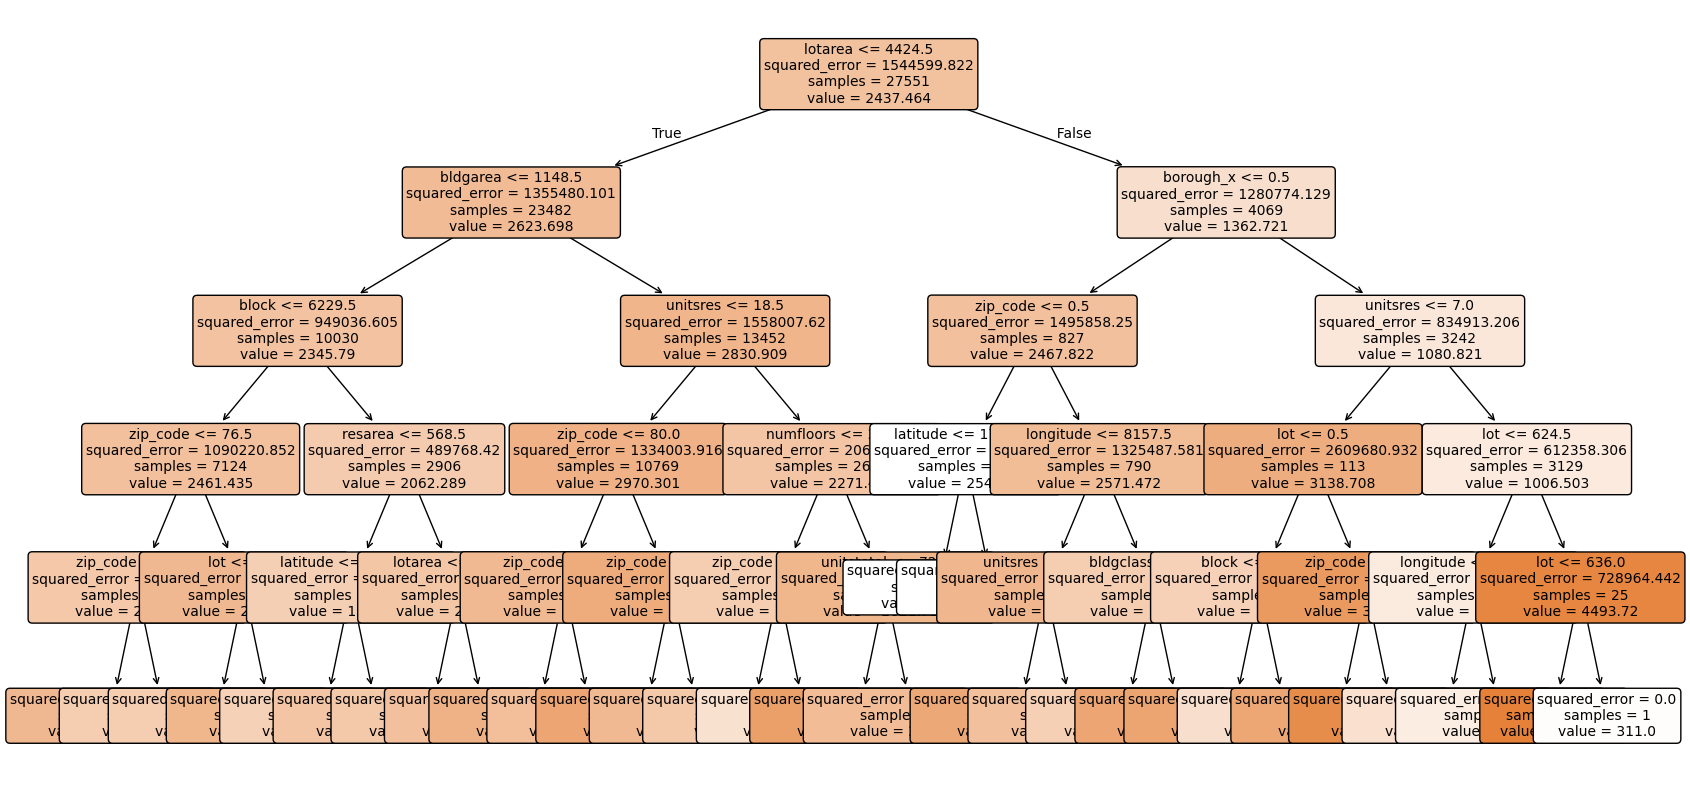

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show()

In [ ]:
import joblib

joblib.dump(model, "decision_tree_model.pkl")
model = joblib.load("decision_tree_model.pkl")

sample_input = X.iloc[0:1]   # sample row
prediction = model.predict(sample_input)

print("Predicted Sale Price:", prediction[0])


Predicted Sale Price: 2951.7034914017718
